# Kartik More | LGMVIP | Data Science




# Task-2: Develop a neural network that can read handwritting

# Level: Advance Level


## Importing Libraries

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Loading dataset

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualization of training dataset

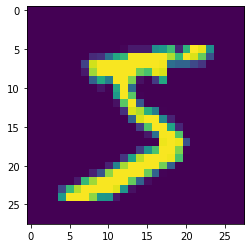

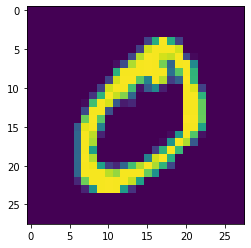

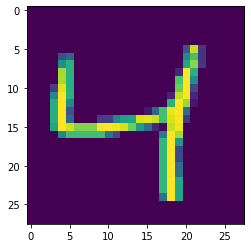

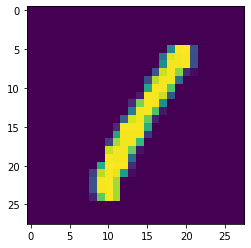

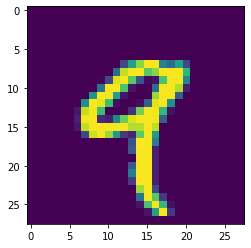

In [15]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()

In [16]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalization of dataset

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [18]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing of images

In [19]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
x_trainr.shape

(60000, 28, 28, 1)

In [11]:
x_testr.shape

(10000, 28, 28, 1)

## Building a CNN model 

In [21]:
### Creating a normal network now
model = Sequential()

### First Convolution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Second Convulution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Third Convulution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### Fully Connected layer 3
model.add(Dense(10))
model.add(Activation("softmax"))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [27]:
history = model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0649 - val_accuracy: 0.9809
Epoch 2/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 3/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0612 - val_accuracy: 0.9830
Epoch 4/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0591 - val_accuracy: 0.9840
Epoch 5/5
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0673 - val_accuracy: 0.9826


## Validating model on test data

In [28]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0743 - accuracy: 0.9826
Test loss on 10,000 test samples 0.07427341490983963
Validation on 10,000 test samples 0.9825999736785889


## Plotting of accuracy and loss function graph  

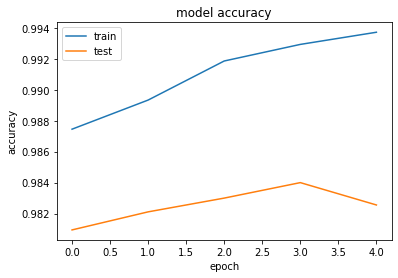

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

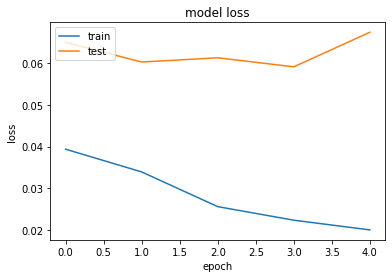

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting some images from test data 

In [31]:
predictions = model.predict([x_testr])

Actual number 7
Predicted number 7


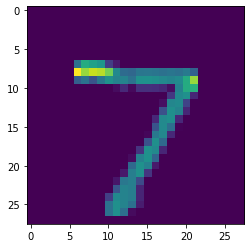

Actual number 2
Predicted number 2


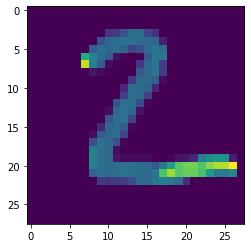

Actual number 1
Predicted number 1


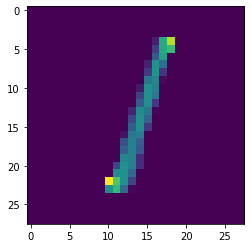

Actual number 0
Predicted number 0


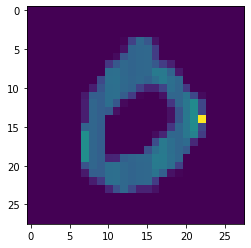

Actual number 4
Predicted number 4


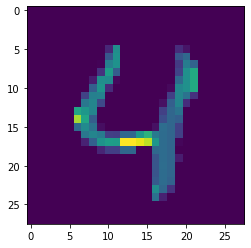

In [32]:
for i in range(5):
    print("Actual number",y_test[i])
    print("Predicted number",np.argmax(predictions[i]))
    plt.imshow(x_test[i])
    plt.show()

## Saving the model

In [33]:
model.save("model.h5")